Import library and datase

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
cwd = os.getcwd()

DATA_DIR = "../data"

TRAIN_FILE = "{}/train.csv".format(DATA_DIR)
TEST_FILE = "{}/test.csv".format(DATA_DIR)
SUBMISSION_FILE = "{}/sample_submission.csv".format(DATA_DIR)

train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

combine = [train, test]

Some feature engineering

In [44]:
for dataset in combine:
    dataset['tenth_minute_of_the_day'] = dataset['A'] % 144
    dataset['hour_of_day'] = dataset['A'] // 6 % 24
    dataset['day_of_week'] = dataset['A'] // 144 % 7
    dataset['tenth_minute_of_the_week'] = dataset['A'] % (144*7)

Penggunaan energi pada menit ke sepuluh pada satu hari dalam satu minggu
Contoh: penggunaan saat jam 00.00 pada hari SENIN

tenth_minute_of_the_day: 0 = 00:00, 143 = 23:50
day_of_week: 0 = senin, 6 = minggu

In [53]:
train[['tenth_minute_of_the_day','B', 'day_of_week', 'hour_of_day']].loc[train['A'].isin([1, 145, 289, 433, 577, 721, 865, 1009, 1153])]

,tenth_minute_of_the_day,B,day_of_week,hour_of_day
0,1,60,0,0
144,1,60,1,0
288,1,90,2,0
432,1,910,3,0
576,1,90,4,0
720,1,80,5,0
864,1,90,6,0
1008,1,40,0,0
1152,1,50,1,0


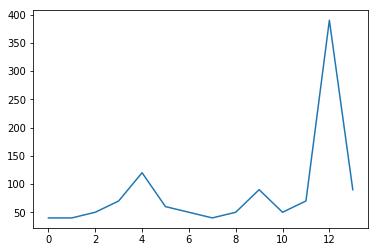

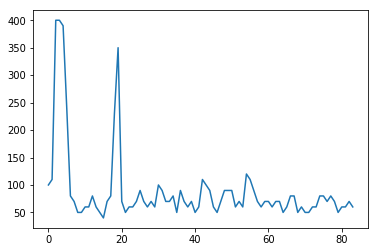

In [52]:
plt.plot(train[['B']].loc[train['tenth_minute_of_the_day'].isin([143]) & train['day_of_week'].isin([0])].reset_index(drop=True))
plt.show()
plt.plot(train[['B']].loc[train['hour_of_day'].isin([5])& train['day_of_week'].isin([0])].reset_index(drop=True))
plt.show()

In [54]:
Distribusi B

SyntaxError: invalid syntax (<ipython-input-54-b18af59f4497>, line 1)

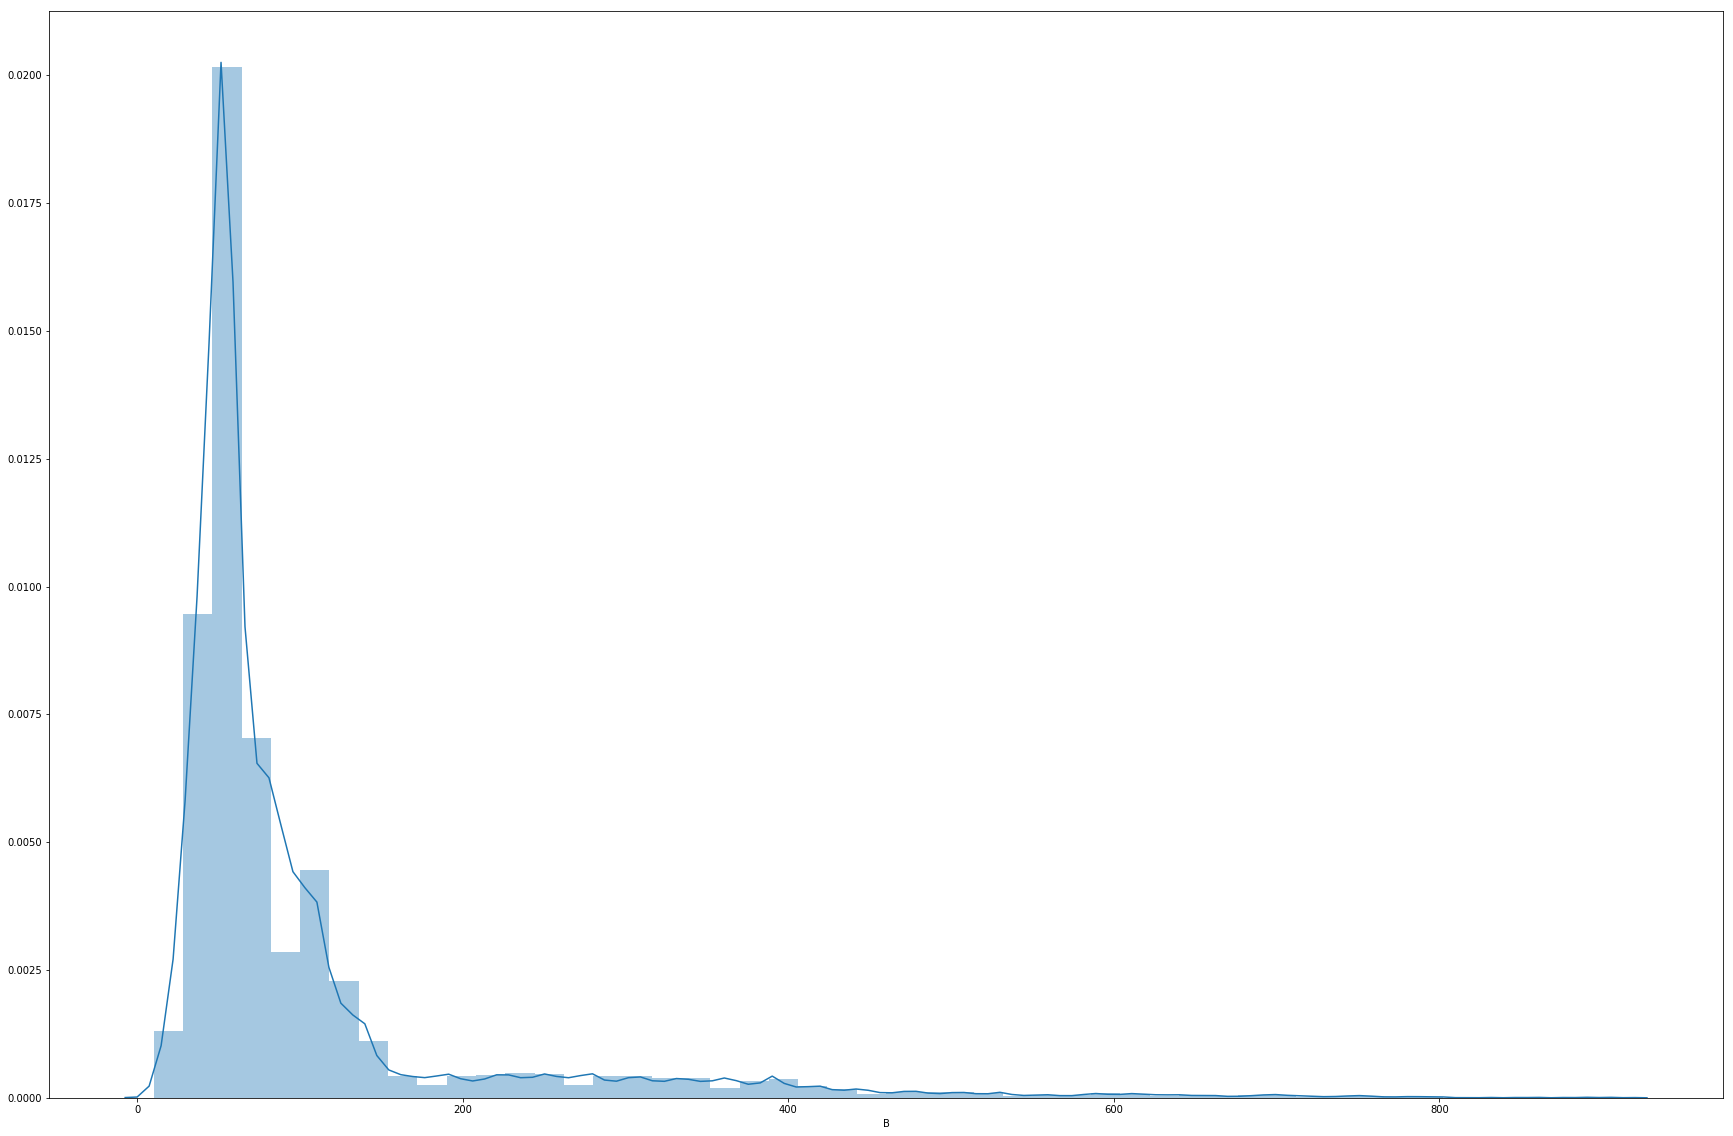

In [13]:
sns.distplot(train['B'])
fig=plt.gcf()
fig.set_size_inches(30,20)

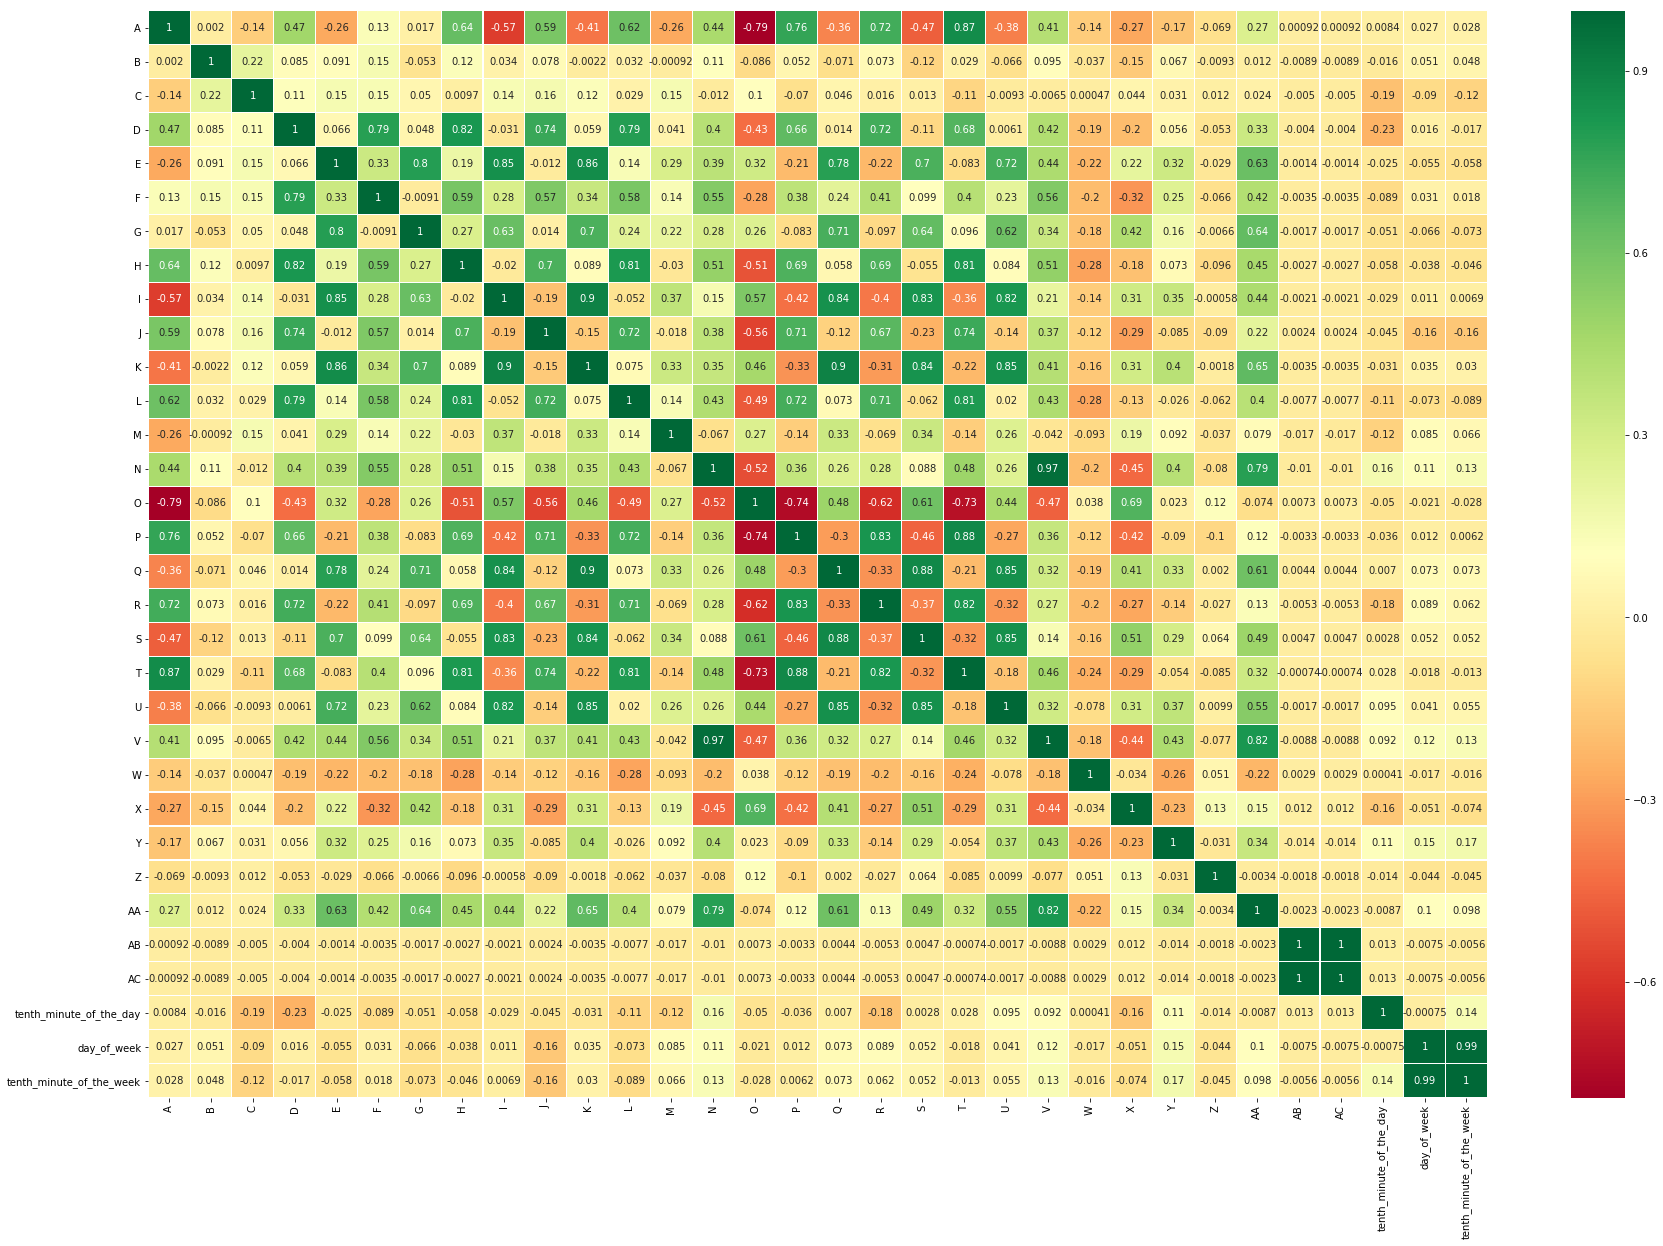

In [9]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.1,xticklabels=True,yticklabels=True) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
# plt.savefig("test2.svg")